<a href="https://colab.research.google.com/github/techzzy/F25-MAT-1630/blob/main/finite_difference_continuation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Approximating the Second Derivative with the Centered Difference Formula

So far, we have used *finite differences* to approximate the **first derivative** of a function $f(x)$.  
We can use the same idea to approximate the **second derivative** $f''(x)$.

### Derivation

Start from the **Taylor expansions** around a point $x_0$:

$$
\begin{aligned}
f(x_0 + h) &= f(x_0) + h f'(x_0) + \frac{h^2}{2} f''(x_0) + O(h^3), \\
f(x_0 - h) &= f(x_0) - h f'(x_0) + \frac{h^2}{2} f''(x_0) + O(h^3).
\end{aligned}
$$

If we **add** these two equations, the $f'(x_0)$ terms cancel:

$$
f(x_0 + h) - 2f(x_0) + f(x_0 - h) = h^2 f''(x_0) + O(h^4).
$$

Rearranging gives the **centered finite difference approximation** for the second derivative:

$$
f''(x_0) \approx \frac{f(x_0 + h) - 2f(x_0) + f(x_0 - h)}{h^2}.
$$

### Properties

- It is **second-order accurate**, meaning the error behaves like $ O(h^2)$.  
- It uses function values **symmetric** around $x_0$, which improves accuracy compared to one-sided formulas.  
- This same formula is fundamental in **finite difference methods** for solving differential equations later in the course.

### Quick Check

For $f(x) = \sin(x)$ the true second derivative is $f''(x) = -\sin(x)$.  
We’ll now use this formula to approximate $f''(x_0)$ and study how the error changes with $h$.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

def f(x): return np.sin(x)
def df_exact(x): return np.cos(x)


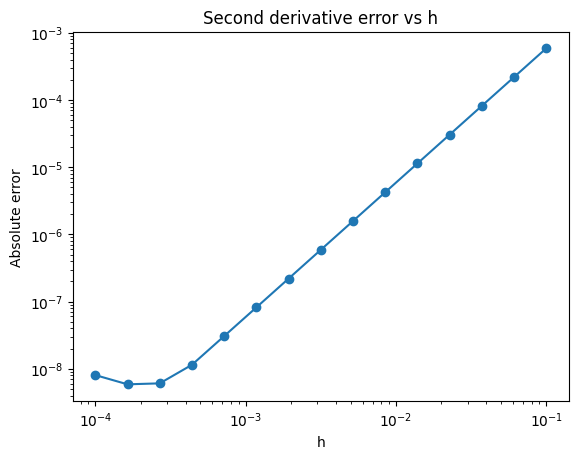

In [ ]:
#@title Approximation of f''(x)
def d2f_exact(x): return -np.sin(x)

x0 = math.pi/4
hs = np.logspace(-4, -1, 15)
errs = []
for h in hs:
    d2 = (f(x0+h) - 2*f(x0) + f(x0-h)) / h**2
    errs.append(abs(d2 - d2f_exact(x0)))

plt.loglog(hs, errs, 'o-')
plt.xlabel("h"); plt.ylabel("Absolute error")
plt.title("Second derivative error vs h")
plt.show()



## Exercise 1 (Manual Computation)

Let $f(x) = e^x$.  
We will approximate $f''(0)$ using the centered difference formula above.

1. Compute the approximation for $h = 0.1$ and $h = 0.01$.  
2. Compute the exact value of $f''(0)$.  
3. Compute the absolute error for each $h$.  
4. Discuss how the error changes as $h$ decreases.



In [ ]:
import numpy as np

def f(x):
    return np.exp(x)

def second_derivative_centered(f, x, h):
    return (f(x + h) - 2*f(x) + f(x - h)) / h**2

x0 = 0.0
for h in [0.1, 0.01]:
    approx = second_derivative_centered(f, x0, h)
    exact = np.exp(x0)
    err = abs(approx - exact)
    print(f"h = {h:.2e}, approx = {approx:.6f}, exact = {exact:.6f}, error = {err:.2e}")


h = 1.00e-01, approx = 1.000834, exact = 1.000000, error = 8.34e-04
h = 1.00e-02, approx = 1.000008, exact = 1.000000, error = 8.33e-06


## Exercise 2 – Exploring Error as h Changes

Now we will explore how the error behaves as we make $h$ smaller.


In [ ]:
for h in [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]:
    approx = second_derivative_centered(f, x0, h)
    exact = np.exp(x0)
    err = abs(approx - exact)
    print(f"h = {h:.1e}, approx = {approx:.6f}, error = {err:.2e}")


h = 1.0e-01, approx = 1.000834, error = 8.34e-04
h = 1.0e-02, approx = 1.000008, error = 8.33e-06
h = 1.0e-03, approx = 1.000000, error = 8.34e-08
h = 1.0e-04, approx = 1.000000, error = 5.02e-09
h = 1.0e-05, approx = 0.999999, error = 1.03e-06


In [ ]:
hs = np.logspace(-1, -5, 5)
errors = []

for h in hs:
    err = abs(second_derivative_centered(f, 1.0, h) - np.exp(1.0))
    errors.append(err)

p = np.polyfit(np.log(hs), np.log(errors), 1)[0]
print(f"Estimated order of accuracy: {p:.2f}")


Estimated order of accuracy: 0.79


## Exercise 4 – Comparing Forward, Backward, and Centered Formulas

The forward and backward finite difference formulas for the second derivative are:

**Forward difference:**
$$
f''(x) \approx \frac{f(x + 2h) - 2f(x + h) + f(x)}{h^2}
$$

**Backward difference:**
$$
f''(x) \approx \frac{f(x) - 2f(x - h) + f(x - 2h)}{h^2}
$$

We will compare their accuracy to the centered formula using $f(x) = \sin(x)$ at $x = \pi/4$.


In [ ]:
def second_derivative_forward(f, x, h):
    return (f(x + 2*h) - 2*f(x + h) + f(x)) / h**2

def second_derivative_backward(f, x, h):
    return (f(x) - 2*f(x - h) + f(x - 2*h)) / h**2

f = np.sin
x0 = np.pi / 4
exact = -np.sin(x0)

for h in [0.1, 0.05, 0.01]:
    fwd = second_derivative_forward(f, x0, h)
    bwd = second_derivative_backward(f, x0, h)
    cen = second_derivative_centered(f, x0, h)
    print(f"h={h:.2f}")
    print(f"  Forward  error: {abs(fwd - exact):.2e}")
    print(f"  Backward error: {abs(bwd - exact):.2e}")
    print(f"  Centered error: {abs(cen - exact):.2e}")


h=0.10
  Forward  error: 6.64e-02
  Backward error: 7.47e-02
  Centered error: 5.89e-04
h=0.05
  Forward  error: 3.43e-02
  Backward error: 3.64e-02
  Centered error: 1.47e-04
h=0.01
  Forward  error: 7.03e-03
  Backward error: 7.11e-03
  Centered error: 5.89e-06


## Exercise 5 - Reflection Questions

1. Which method gives the smallest error for the same value of $h$?  
The center difference method
2. Why is the centered difference method more accurate?
It uses information from both sides of x which makes it more accurate.  
3. How does truncation error depend on $h$?  
Truncation error decreases as h decreases.
4. Why does reducing $h$ too much sometimes increase total error?
When h gets too small, floating error gets larger tan truncation error, causing total error to increase.
